In [1]:
# Required python packages:
import sqlite3
import pandas as pd
import re
import numpy as np
import seaborn as sns
import math

In [2]:
# Importing dataset:
df = pd.read_csv("indeedjobs2022.csv")

In [3]:
# Prevewing the values in each feature:
df.apply(lambda col: col.unique())

# Row count
print(len(df))

2878


In [4]:
# Remove useless features 
df.drop(['Salary', 'Reviews', 'CompanyLink', 'Stars', 'JobLink', 'CompanyLink', 'DatePosted', 'ExtractDate' ], axis=1, inplace=True)

In [5]:
#  Selecting features with missing values 
NA = [(c, df[c].isna().mean()*100) for c in df]
NA = pd.DataFrame(NA, columns=["column_name", "percentage"])

# Display the percentage of missing values in each feature
NA = NA[NA.percentage > 0]
NA.sort_values("percentage", ascending=False)

,column_name,percentage
5,Remote,76.963169
4,JobType,32.592078
2,Location,8.234885
1,Company,2.258513
0,Title,1.772064
3,Description,1.772064


In [6]:
df = df.drop_duplicates(subset=['Description'], keep='last')

In [7]:
# Row count
print(len(df))

# Prevewing the values in each feature
print(df.apply(lambda col: col.unique()))

1629
Title          [Master Data Analyst, Business Intelligence An...
Company        [Robert Half, Vault Credit Corporation, Adecco...
Location       [Calgary, AB, Montréal, QC, Ottawa, ON, Delta,...
Description    [Our fast paced client in Calgary is currently...
JobType        [Temporary, Fixed term contract, nan, Fixed te...
Remote          [nan, Remote, Hybrid remote, Temporarily remote]
dtype: object


In [8]:
#  Selecting features with missing values 
NA = [(c, df[c].isna().mean()*100) for c in df]
NA = pd.DataFrame(NA, columns=["column_name", "percentage"])

# Display the percentage of missing values in each feature 
NA = NA[NA.percentage > 0]
NA.sort_values("percentage", ascending=False)

,column_name,percentage
5,Remote,77.409454
4,JobType,35.174954
2,Location,5.279312
1,Company,0.675261
0,Title,0.061387
3,Description,0.061387


In [9]:
#df.Description.str.lower().head(8)  # Convert all comments to lowercase

In [10]:
dfl = df.Title.str.lower()
data_analyst = dfl.str.contains("data analyst")
#business_intelligence = dfl.str.contains("business intelligence")
#senior_analyst = dfl.str.contains("senior analyst")
#business_analyst = dfl.str.contains("business analyst")
#payroll_analyst = dfl.str.contains("payroll analyst")
#security_analyst = dfl.str.contains("security analyst")
#analyst = dfl.str.contains("analyst")

df['data_analyst'] = data_analyst
#df['business_intelligence'] = business_intelligence
#df['senior_analyst'] = senior_analyst
#df['business_analyst'] = business_analyst
#df['payroll_analyst'] = payroll_analyst
#df['security_analyst'] = security_analyst
#df['analyst'] = analyst

In [11]:
data_analyst = round(((np.count_nonzero(data_analyst))/(df.Description.count())*100), 3)
#business_intelligence = round(((np.count_nonzero(business_intelligence))/(df.Description.count())*100), 3)
#senior_analyst = round(((np.count_nonzero(senior_analyst))/(df.Description.count())*100), 3)
#business_analyst = round(((np.count_nonzero(business_analyst))/(df.Description.count())*100), 3)
#payroll_analyst = round(((np.count_nonzero(payroll_analyst))/(df.Description.count())*100), 3)
#security_analyst = round(((np.count_nonzero(security_analyst))/(df.Description.count())*100), 3)
#analyst = round(((np.count_nonzero(analyst))/(df.Description.count())*100), 3)

In [12]:
#df2 = pd.DataFrame({"Name":['data_analyst', 'business_intelligence', 'senior_analyst', 'business_analyst', 'payroll_analyst', 'security_analyst', 'analyst'],
                 #  "Percentage":[data_analyst, business_intelligence, senior_analyst, business_analyst, payroll_analyst, security_analyst, analyst]})

In [13]:
df = df[df['data_analyst'] == True]

In [14]:
dfl = df.Description.str.lower()
python = dfl.str.contains("python")
powerbi = dfl.str.contains("power bi")
tableau = dfl.str.contains("tableau")
qliksense = dfl.str.contains("qlik sense")
looker = dfl.str.contains("looker")
klipfolio = dfl.str.contains("klipfolio")
domo = dfl.str.contains("domo")

df['python'] = python
df['powerbi'] = powerbi
df['tableau'] = tableau
df['qliksense'] = qliksense
df['looker'] = looker
df['klipfolio'] = klipfolio
df['domo'] = domo

In [15]:
python = round(((np.count_nonzero(python))/(df.Description.count())*100), 3)
powerbi = round(((np.count_nonzero(powerbi))/(df.Description.count())*100), 3)
tableau = round(((np.count_nonzero(tableau))/(df.Description.count())*100), 3)
qliksense = round(((np.count_nonzero(qliksense))/(df.Description.count())*100), 3)
looker = round(((np.count_nonzero(looker))/(df.Description.count())*100), 3)
klipfolio = round(((np.count_nonzero(klipfolio))/(df.Description.count())*100), 3)
domo = round(((np.count_nonzero(domo))/(df.Description.count())*100), 3)

In [16]:
df1 = pd.DataFrame({"Name":['python', 'powerbi', 'tableau', 'qliksense', 'looker', 'klipfolio', 'domo'],
                   "Percentage":[python, powerbi, tableau, qliksense, looker, klipfolio, domo]})

In [17]:
df1.sort_values("Percentage", ascending=False)

,Name,Percentage
0,python,38.957
2,tableau,28.834
1,powerbi,23.313
4,looker,5.521
6,domo,1.534
3,qliksense,0.000
5,klipfolio,0.000


In [18]:
dft = df.Location.str.lower()
AB = dfl.str.contains(", ab")
BC = dfl.str.contains(", bc")
ON = dfl.str.contains(", on")
NS = dfl.str.contains(", ns")
QC = dfl.str.contains(", qc")
SK = dfl.str.contains(", sk")
NB = dfl.str.contains(", nb")

df['AB'] = AB
df['BC'] = BC
df['ON'] = ON
df['NS'] = NS
df['QC'] = QC
df['SK'] = SK
df['NB'] = NB

In [19]:
AB = round(((np.count_nonzero(AB))/(df.Description.count())*100), 3)
BC = round(((np.count_nonzero(BC))/(df.Description.count())*100), 3)
ON = round(((np.count_nonzero(ON))/(df.Description.count())*100), 3)
NS = round(((np.count_nonzero(NS))/(df.Description.count())*100), 3)
QC = round(((np.count_nonzero(QC))/(df.Description.count())*100), 3)
SK = round(((np.count_nonzero(SK))/(df.Description.count())*100), 3)
NB = round(((np.count_nonzero(NB))/(df.Description.count())*100), 3)

In [20]:
df2 = pd.DataFrame({"Name":['AB', 'BC', 'ON', 'NS', 'QC', 'SK', 'NB'],
                   "Percentage":[AB, BC, ON, NS, QC, SK, NB]})

In [21]:
df2.sort_values("Percentage", ascending=False)

,Name,Percentage
2,ON,30.061
0,AB,11.963
5,SK,7.362
1,BC,3.067
4,QC,1.534
6,NB,0.613
3,NS,0.307


<AxesSubplot:xlabel='Remote', ylabel='count'>

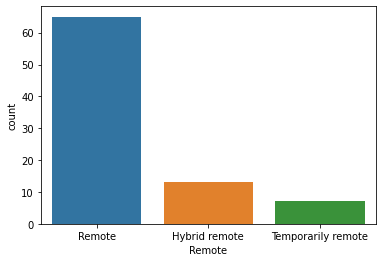

In [22]:
sns.countplot(x="Remote", data=df)

In [23]:
df.Description.str.len().head(30)  # Get the length of all comments

0      2386
5      2376
8      1532
196    3471
246    1904
248    5400
252    3278
265    5438
271    3236
273    4853
287    3149
291    2228
292    2595
296    3971
318    6290
369    5235
377    2325
399    6265
424    5032
425    5943
473    4674
480    4576
517    7578
573    5866
592    9273
598    4531
609    2995
636    3534
637    2039
647    4472
Name: Description, dtype: int64

In [24]:
print(df)

                                                  Title  \
0                                   Master Data Analyst   
5          Clinical Data Analyst - Blood Gas Specialist   
8                     Clinical Data Analyst - Blood Gas   
196   Data Analyst-Coder - Decision Support - Tempor...   
246                                 Data Analyst Mentor   
...                                                 ...   
2819                                  Lead Data Analyst   
2820                            SAP Master Data Analyst   
2823                                Senior Data Analyst   
2826  Junior Data Analyst - Contract - ($36-41/hr in...   
2828                            Accounting Data Analyst   

                                Company           Location  \
0                           Robert Half        Calgary, AB   
5                         Adecco Canada         Ottawa, ON   
8          MaxSys Staffing & Consulting         Ottawa, ON   
196   Sunnybrook Health Sciences Centre    

In [25]:
df.to_csv("indeedjobs2022cleaned.csv", index = False)